Approximate non linear equations calculations. Use Newton method, secant method and reversed iterations method. Chord method is not needed (p. 12, ex. 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
random.seed(10)

from scipy.optimize import fsolve

plt.style.use('seaborn')

# Function investigation 

We are given this non linear function: $$63x^5 - 70x^3 + 15x^2 - 8x = 0$$

In [2]:
def f(x):
    return 63*x**5 - 70*x**3 + 15*x**2 - 8*x

In [3]:
def f_derivative(x):
    return 315*x**4 - 210*x**2 + 30*x - 8

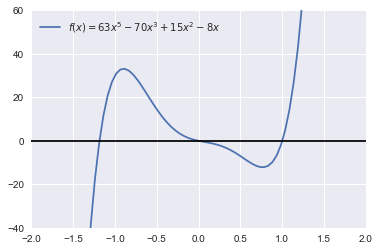

In [4]:
# Building plot.

x = np.linspace(-2.5, 2.5, 100)
y = f(x)

plt.plot(x, y, label='$f(x) = 63x^5 - 70x^3 + 15x^2 - 8x$')
plt.plot([-2.5, 2.5], [0, 0], c='k')
plt.ylim(-40, 60)
plt.xlim(-2, 2)
plt.legend()

plt.show()

In [5]:
print('Exact roots are: \nx1={:.7f}\nx2={:.7f}\nx3={:.7f}'.format(fsolve(f, -1)[0],
                                                                  fsolve(f, 0.1)[0], 
                                                                  fsolve(f, 2)[0]))

Exact roots are: 
x1=-1.1843463
x2=0.0000000
x3=1.0000000


In [6]:
bounds = [(-3., -1.), (-0.5, 0.2), (0.7, 1.5)]
print('Bounds are: \nx1 in {}\nx2 in {}\nx3 in {}'.format(bounds[0], 
                                                          bounds[1], 
                                                          bounds[2]))

Bounds are: 
x1 in (-3.0, -1.0)
x2 in (-0.5, 0.2)
x3 in (0.7, 1.5)


# Narrowing intervals 

In [7]:
def bisection(f, a, b, eps=1e-1):
    '''Narrowing root intervals.
    
    Args:
        f (func): Function that roots are being searched of.
        a, b (float): Bounds where root is located.
        eps (float): Accuracy (minimal half distance between bounds).
        
    Returns:
        bounds (tuple<float, float>): Narrowed bounds.
    '''
        
    if f(a) * f(b) >= 0:
        print('Bisection method fails.')
        return []
    
    bounds = ()
    c = (a + b) / 2.    
    
    while (b - a) / 2 > eps:
       
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        
        c = (a + b) / 2
        bounds = (a, b)
        
    return bounds

In [8]:
bounds_narrowed = [bisection(f, *bounds_) for bounds_ in bounds]
print('Narrowed bounds are: \nx1 in {}\nx2 in {}\nx3 in {}'.format(bounds_narrowed[0], 
                                                                   bounds_narrowed[1], 
                                                                   bounds_narrowed[2]))

Narrowed bounds are: 
x1 in (-1.25, -1.125)
x2 in (-0.15, 0.02500000000000001)
x3 in (1.0, 1.1)


# Newton method 

In [9]:
def newton(f, f_derivative, a, b, eps=1e-7):
    '''Approximately counting root value using Newton method.
    
    Args:
        f (func): Function that roots are being searched of.
        f_derivative (func): Derivative of f function.
        a, b (float): Bounds where root is located.
        eps (float): Accuracy (minimum distance between neighbour values).
    
    Returns:
        xs (list<float>): List with root value (the last value is most accurate).
    '''        
    
    x_0 = random.uniform(a, b)
    x_1 = x_0 - f(x_0) / f_derivative(x_0)
    
    xs = []
    xs.append(x_0)
    xs.append(x_1)
    
    while np.abs(xs[-1] - xs[-2]) > eps:
        x_k = xs[-1] - f(xs[-1]) / f_derivative(xs[-1])
        xs.append(x_k)
        
    return np.array(xs)

In [10]:
# Exact value.
x1 = newton(f, f_derivative, *bounds_narrowed[0])[-1]

# Values from newton method.
x_k = newton(f, f_derivative, *bounds_narrowed[0])

# Initializing k list.
k = list(range(len(x_k)))

# Difference between neighbour elements in x_k
x_k_1 = np.insert((x_k[1:] - x_k[:-1]), 0, 0)

# Difference between predicted value
# and actual value.
x_k_x1 = x_k - x1

# Function values.
f_x_k = f(x_k)

In [11]:
# Initializing DataFrame.
df = pd.DataFrame()
df["$k$"] = k
df["$x_k$"] = x_k
df["$x_k - x_{k-1}$"] = x_k_1
df["$x_k - x^*$"] = x_k_x1
df["$f(x_k)$"] = f_x_k

display(df.set_index("$k$"))

,$x_k$,$x_k - x_{k-1}$,$x_k - x^*$,$f(x_k)$
$k$,,,,
0,-1.196389,0.000000e+00,-1.204257e-02,-3.506998e+00
1,-1.184733,1.165570e-02,-3.868663e-04,-1.090859e-01
2,-1.184347,3.864509e-04,-4.154227e-07,-1.170124e-04
3,-1.184346,4.154223e-07,-4.780620e-13,-1.351044e-10
4,-1.184346,4.796163e-13,1.554312e-15,1.243450e-14


# Secant method 

In [12]:
def secant(f, f_derivative, a, b, eps=1e-4):
    '''Approximately counting root value using secant method.
    
    Args:
        f (func): Function that roots are being searched of.
        f_derivative (func): Derivative of f function.
        a, b (float): Bounds where root is located.
        eps (float): Accuracy (minimum distance between neighbour values).
    
    Returns:
        xs (list<float>): List with root value (the last value is most accurate).
    '''        
    
    x_0 = random.uniform(a, b)
    x_1 = x_0 - f(x_0) / f_derivative(x_0)
    
    xs = []
    xs.append(x_0)
    xs.append(x_1)
    
    while np.abs(xs[-1] - xs[-2]) > eps:
        x_k = xs[-1] - (f(xs[-1]) / (f(xs[-1]) - f(xs[-2]))) * (xs[-1] - xs[-2])
        xs.append(x_k)
        
    return np.array(xs)

In [13]:
# Values from newton method.
x_k = secant(f, f_derivative, *bounds_narrowed[0])

# Initializing k list.
k = list(range(len(x_k)))

# Difference between neighbour elements in x_k
x_k_1 = np.insert((x_k[1:] - x_k[:-1]), 0, 0)

# Difference between predicted value
# and actual value.
x_k_x1 = x_k - x1

# Function values.
f_x_k = f(x_k)

In [14]:
# Initializing DataFrame.
df = pd.DataFrame()
df["$k$"] = k
df["$x_k$"] = x_k
df["$x_k$ - $x_{k-1}$"] = x_k_1
df["$x_k - x^*$"] = x_k_x1
df["$f(x_k)$"] = f_x_k

display(df.set_index("$k$"))

,$x_k$,$x_k$ - $x_{k-1}$,$x_k - x^*$,$f(x_k)$
$k$,,,,
0,-1.177739,0.000000,6.607713e-03,1.827248e+00
1,-1.184471,-0.006732,-1.242106e-04,-3.499851e-02
2,-1.184344,0.000127,2.307161e-06,6.498545e-04
3,-1.184346,-0.000002,7.963394e-10,2.243047e-07


# Iterations method 

In [15]:
def iterations(f, M, a, b, eps=1e-8):
    '''Approximately counting root value using iterations method.
    
    Args:
        f (func): Function that roots are being searched of.
        M (float): Upper bound of f_derivative on (a,b).
        a, b (float): Bounds where root is located.
        eps (float): Accuracy (minimum distance between neighbour values).
    
    Returns:
        xs (list<float>): List with root value (the last value is most accurate).
    '''        
    
    x_0 = random.uniform(a, b)
    x_1 = x_0 - (1 / M) * f(x_0)
    
    xs = []
    xs.append(x_0)
    xs.append(x_1)
    
    while np.abs(xs[-1] - xs[-2]) > eps:
        x_k = xs[-1] - (1 / M) * f(xs[-1])
        xs.append(x_k)
        
    return np.array(xs)

In [16]:
# Upper bound of f_derivative on (a,b).
M = 500

# Values from newton method.
x_k = iterations(f, 500, *bounds_narrowed[0])

# Initializing k list.
k = list(range(len(x_k)))

# Difference between neighbour elements in x_k
x_k_1 = np.insert((x_k[1:] - x_k[:-1]), 0, 0)

# Difference between predicted value
# and actual value.
x_k_x1 = x_k - x1

# Function values.
f_x_k = f(x_k)

In [17]:
# Initializing DataFrame.
df = pd.DataFrame()
df["$k$"] = k
df["$x_k$"] = x_k
df["$x_k$ - $x_{k-1}$"] = x_k_1
df["$x_k - x^*$"] = x_k_x1
df["$f(x_k)$"] = f_x_k

display(df.set_index("$k$"))

,$x_k$,$x_k$ - $x_{k-1}$,$x_k - x^*$,$f(x_k)$
$k$,,,,
0,-1.224238,0.000000e+00,-3.989142e-02,-12.534643
1,-1.199168,2.506929e-02,-1.482213e-02,-4.349617
2,-1.190469,8.699233e-03,-6.122901e-03,-1.754176
3,-1.186961,3.508353e-03,-2.614548e-03,-0.741807
4,-1.185477,1.483613e-03,-1.130935e-03,-0.319553
5,-1.184838,6.391064e-04,-4.918285e-04,-0.138723
6,-1.184561,2.774459e-04,-2.143827e-04,-0.060421
7,-1.184440,1.208424e-04,-9.354025e-05,-0.026354
8,-1.184387,5.270871e-05,-4.083154e-05,-0.011502
